<a href="https://colab.research.google.com/github/worawit-saetan/Kaggle-House-Prices---Advanced-Regression-Techniques/blob/main/Kaggle_House_Prices_Advanced_Regression_Techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kaggle House Prices - Advanced Regression Techniques

Predict sales prices and practice feature engineering, RFs, and gradient boosting

## The outline is as follows
+ read the the dataset and split it into training and test set
+ check and fill in missing data
+ encode columns with one hot encoder
+ scaling the target value with Log10 (cheap and expensive houses will affect the result equally)
+ train our XGBoost model with GridSearchCV and test its score on test set
+ train another XGBoost model with manual setting and test its score on test set
+ train another XGBoost model with the same manual setting on merged train-test set (train with more data)
+ sent our models' predictions to Kaggle

In [1]:
import pandas as pd
dataset = pd.read_csv('/content/train.csv')
dataset.shape

(1460, 81)

In [2]:
dataset

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [32]:
X = dataset.drop(['SalePrice'],axis=1)
y = dataset['SalePrice']

In [33]:
X.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [34]:
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1168, 80)
(292, 80)
(1168,)
(292,)


In [36]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1168 entries, 1405 to 924
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    967 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          78 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  Overal

In [37]:
X_train = X_train.drop( ['Id','Alley','PoolQC','Fence','MiscFeature'], axis=1)

In [38]:
X_train.shape

(1168, 75)

In [39]:
import seaborn as sns

FireplaceQu has 623 (1168 total) which is 53%, then we will not delete this column. we will plot the countplot graph to see more information about it

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


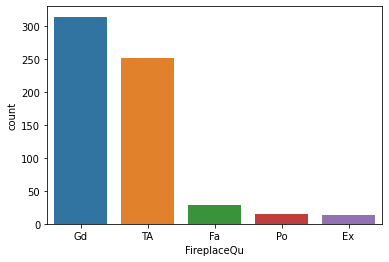

In [40]:
sns.countplot(X_train['FireplaceQu'])

fill in with most frequent used value in this case will ruin the distribution of this column, then we will fill in with "None".

Let's fill in missing value depending on the type of  columns

In [51]:
from sklearn.impute  import SimpleImputer
import numpy as np

imp_median = SimpleImputer(missing_values=np.nan, strategy='median')
imp_mode_int = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp_mode_object = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp_constant = SimpleImputer(missing_values=np.nan, strategy='constant',fill_value="None")

In [43]:
 float64_columns = []
 int64_columns = []
 object_columns = [] # except the FireplaceQu column

 
 for column in X_train.columns:
   if  column == 'FireplaceQu':
     continue
   elif X_train[column].dtype == 'float64':
     float64_columns = np.concatenate((float64_columns, [column]))
   elif X_train[column].dtype == 'int64' :
     int64_columns = np.concatenate((int64_columns, [column]))
   else :
     object_columns = np.concatenate((object_columns, [column]))


In [44]:
float64_columns

array(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='<U32')

In [45]:
float64_columns.shape

(3,)

In [46]:
int64_columns

array(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'], dtype='<U32')

In [47]:
int64_columns.shape

(33,)

In [52]:
object_columns

array(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'], dtype='<U32')

In [50]:
object_columns.shape

(38,)

In [53]:
imp_median.fit(X_train[float64_columns])
imp_mode_int.fit(X_train[int64_columns])
imp_mode_object.fit(X_train[object_columns])
imp_constant.fit(np.array(X_train['FireplaceQu']).reshape(-1,1))

SimpleImputer(fill_value='None', strategy='constant')

In [65]:
imp_median.feature_names_in_

array(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype=object)

In [64]:
imp_median.statistics_

array([  70.,    0., 1980.])

In [66]:
imp_mode_int.feature_names_in_

array(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'], dtype=object)

In [59]:
imp_mode_int.statistics_

array([2.000e+01, 7.200e+03, 5.000e+00, 5.000e+00, 2.006e+03, 1.950e+03,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 8.640e+02, 0.000e+00,
       0.000e+00, 8.640e+02, 0.000e+00, 0.000e+00, 2.000e+00, 0.000e+00,
       3.000e+00, 1.000e+00, 6.000e+00, 0.000e+00, 2.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 6.000e+00, 2.007e+03])

In [67]:
imp_mode_object.feature_names_in_

array(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'], dtype=object)

In [62]:
imp_mode_object.statistics_

array(['RL', 'Pave', 'Reg', 'Lvl', 'AllPub', 'Inside', 'Gtl', 'NAmes',
       'Norm', 'Norm', '1Fam', '1Story', 'Gable', 'CompShg', 'VinylSd',
       'VinylSd', 'None', 'TA', 'TA', 'PConc', 'TA', 'TA', 'No', 'Unf',
       'Unf', 'GasA', 'Ex', 'Y', 'SBrkr', 'TA', 'Typ', 'Attchd', 'Unf',
       'TA', 'TA', 'Y', 'WD', 'Normal'], dtype=object)

In [68]:
imp_constant.statistics_

array(['None'], dtype=object)

In [69]:
X_train[float64_columns] = imp_median.transform(X_train[float64_columns])
X_train[int64_columns] = imp_mode_int.transform(X_train[int64_columns])
X_train[object_columns] = imp_mode_object.transform(X_train[object_columns])
X_train['FireplaceQu'] = imp_constant.transform(np.array(X_train['FireplaceQu']).reshape(-1,1))

Let's check X_train, now it has no null values

In [70]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1168 entries, 1405 to 924
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1168 non-null   int64  
 1   MSZoning       1168 non-null   object 
 2   LotFrontage    1168 non-null   float64
 3   LotArea        1168 non-null   int64  
 4   Street         1168 non-null   object 
 5   LotShape       1168 non-null   object 
 6   LandContour    1168 non-null   object 
 7   Utilities      1168 non-null   object 
 8   LotConfig      1168 non-null   object 
 9   LandSlope      1168 non-null   object 
 10  Neighborhood   1168 non-null   object 
 11  Condition1     1168 non-null   object 
 12  Condition2     1168 non-null   object 
 13  BldgType       1168 non-null   object 
 14  HouseStyle     1168 non-null   object 
 15  OverallQual    1168 non-null   int64  
 16  OverallCond    1168 non-null   int64  
 17  YearBuilt      1168 non-null   int64  
 18  YearRe

In [77]:
for column in object_columns:  
  print(column," :", X_train[column].unique())

MSZoning  : ['RM' 'RL' 'FV' 'RH' 'C (all)']
Street  : ['Pave' 'Grvl']
LotShape  : ['IR1' 'Reg' 'IR2' 'IR3']
LandContour  : ['HLS' 'Lvl' 'Low' 'Bnk']
Utilities  : ['AllPub' 'NoSeWa']
LotConfig  : ['Inside' 'Corner' 'CulDSac' 'FR2' 'FR3']
LandSlope  : ['Mod' 'Gtl' 'Sev']
Neighborhood  : ['Crawfor' 'CollgCr' 'NridgHt' 'Sawyer' 'IDOTRR' 'Mitchel' 'NAmes'
 'MeadowV' 'Timber' 'ClearCr' 'NPkVill' 'NWAmes' 'Veenker' 'BrkSide'
 'Somerst' 'SawyerW' 'Edwards' 'OldTown' 'BrDale' 'Gilbert' 'Blmngtn'
 'StoneBr' 'SWISU' 'NoRidge']
Condition1  : ['Norm' 'Artery' 'RRAe' 'Feedr' 'RRNn' 'RRAn' 'PosA' 'PosN' 'RRNe']
Condition2  : ['Norm' 'RRNn' 'Artery' 'Feedr' 'RRAe' 'PosN']
BldgType  : ['TwnhsE' '1Fam' 'Duplex' 'Twnhs' '2fmCon']
HouseStyle  : ['1Story' '2Story' 'SLvl' '1.5Fin' '1.5Unf' '2.5Unf' 'SFoyer' '2.5Fin']
RoofStyle  : ['Hip' 'Gable' 'Flat' 'Gambrel' 'Mansard' 'Shed']
RoofMatl  : ['CompShg' 'WdShngl' 'Tar&Grv' 'WdShake' 'Membran' 'ClyTile' 'Roll'
 'Metal']
Exterior1st  : ['CemntBd' 'VinylSd' 'Wd 

Let's encode our columns with one hot encoder

In [81]:
from sklearn.preprocessing import OneHotEncoder

onehot_enc = OneHotEncoder(handle_unknown='ignore')

onehot_columns = np.concatenate( (object_columns, ['FireplaceQu']) ) 

onehot_columns.shape

(39,)

In [82]:
onehot_columns

array(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition', 'FireplaceQu'],
      dtype='<U32')

In [87]:
onehot_enc.fit(X_train[onehot_columns])

OneHotEncoder(handle_unknown='ignore')

In [86]:
onehot_enc.feature_names_in_

array(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition', 'FireplaceQu'],
      dtype=object)

In [88]:
onehot_enc.categories_

[array(['C (all)', 'FV', 'RH', 'RL', 'RM'], dtype=object),
 array(['Grvl', 'Pave'], dtype=object),
 array(['IR1', 'IR2', 'IR3', 'Reg'], dtype=object),
 array(['Bnk', 'HLS', 'Low', 'Lvl'], dtype=object),
 array(['AllPub', 'NoSeWa'], dtype=object),
 array(['Corner', 'CulDSac', 'FR2', 'FR3', 'Inside'], dtype=object),
 array(['Gtl', 'Mod', 'Sev'], dtype=object),
 array(['Blmngtn', 'BrDale', 'BrkSide', 'ClearCr', 'CollgCr', 'Crawfor',
        'Edwards', 'Gilbert', 'IDOTRR', 'MeadowV', 'Mitchel', 'NAmes',
        'NPkVill', 'NWAmes', 'NoRidge', 'NridgHt', 'OldTown', 'SWISU',
        'Sawyer', 'SawyerW', 'Somerst', 'StoneBr', 'Timber', 'Veenker'],
       dtype=object),
 array(['Artery', 'Feedr', 'Norm', 'PosA', 'PosN', 'RRAe', 'RRAn', 'RRNe',
        'RRNn'], dtype=object),
 array(['Artery', 'Feedr', 'Norm', 'PosN', 'RRAe', 'RRNn'], dtype=object),
 array(['1Fam', '2fmCon', 'Duplex', 'Twnhs', 'TwnhsE'], dtype=object),
 array(['1.5Fin', '1.5Unf', '1Story', '2.5Fin', '2.5Unf', '2Story',
        

In [85]:
onehot_enc.get_feature_names_out()

array(['MSZoning_C (all)', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'Street_Grvl', 'Street_Pave', 'LotShape_IR1',
       'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg', 'LandContour_Bnk',
       'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl',
       'Utilities_AllPub', 'Utilities_NoSeWa', 'LotConfig_Corner',
       'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3',
       'LotConfig_Inside', 'LandSlope_Gtl', 'LandSlope_Mod',
       'LandSlope_Sev', 'Neighborhood_Blmngtn', 'Neighborhood_BrDale',
       'Neighborhood_BrkSide', 'Neighborhood_ClearCr',
       'Neighborhood_CollgCr', 'Neighborhood_Crawfor',
       'Neighborhood_Edwards', 'Neighborhood_Gilbert',
       'Neighborhood_IDOTRR', 'Neighborhood_MeadowV',
       'Neighborhood_Mitchel', 'Neighborhood_NAmes',
       'Neighborhood_NPkVill', 'Neighborhood_NWAmes',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_OldTown', 'Neighborhood_SWISU',
       'Neighborhood_Sawyer

In [89]:
encoded_onehot_columns = onehot_enc.get_feature_names_out()
encoded_onehot_columns

array(['MSZoning_C (all)', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'Street_Grvl', 'Street_Pave', 'LotShape_IR1',
       'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg', 'LandContour_Bnk',
       'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl',
       'Utilities_AllPub', 'Utilities_NoSeWa', 'LotConfig_Corner',
       'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3',
       'LotConfig_Inside', 'LandSlope_Gtl', 'LandSlope_Mod',
       'LandSlope_Sev', 'Neighborhood_Blmngtn', 'Neighborhood_BrDale',
       'Neighborhood_BrkSide', 'Neighborhood_ClearCr',
       'Neighborhood_CollgCr', 'Neighborhood_Crawfor',
       'Neighborhood_Edwards', 'Neighborhood_Gilbert',
       'Neighborhood_IDOTRR', 'Neighborhood_MeadowV',
       'Neighborhood_Mitchel', 'Neighborhood_NAmes',
       'Neighborhood_NPkVill', 'Neighborhood_NWAmes',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_OldTown', 'Neighborhood_SWISU',
       'Neighborhood_Sawyer

In [93]:
onehot_enc.transform(X_train[onehot_columns])

<1168x236 sparse matrix of type '<class 'numpy.float64'>'
	with 45552 stored elements in Compressed Sparse Row format>

In [94]:
onehot_enc.transform(X_train[onehot_columns]).toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [95]:
onehot_enc.transform(X_train[onehot_columns]).toarray().shape

(1168, 236)

In [96]:
X_train[onehot_columns]

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,FireplaceQu
1405,RM,Pave,IR1,HLS,AllPub,Inside,Mod,Crawfor,Norm,Norm,...,Gd,Typ,Attchd,Fin,TA,TA,Y,WD,Normal,Gd
1441,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,TA
1056,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,...,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,Gd
854,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,...,TA,Typ,Attchd,Unf,TA,TA,Y,WD,Abnorml,Gd
1153,RM,Pave,Reg,Lvl,AllPub,Corner,Gtl,IDOTRR,Norm,Norm,...,TA,Typ,Detchd,Unf,TA,TA,Y,WD,Normal,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,RM,Pave,Reg,Bnk,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,...,TA,Typ,Detchd,Unf,TA,TA,N,WD,Normal,Gd
191,RL,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,NAmes,Norm,Norm,...,Gd,Typ,Attchd,Fin,TA,TA,Y,WD,Normal,None
1397,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,Norm,...,TA,Typ,Detchd,Unf,Fa,Fa,N,WD,Normal,None
1218,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,Norm,...,TA,Typ,Attchd,Unf,TA,TA,N,WD,Normal,None


In [97]:
X_train[encoded_onehot_columns] = onehot_enc.transform(X_train[onehot_columns]).toarray()

X_train


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[col] = igetitem(value, i)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA
1405,120,RM,44.0,3842,Pave,IR1,HLS,AllPub,Inside,Mod,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1441,120,RM,70.0,4426,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1056,120,RL,43.0,7052,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
854,20,RL,102.0,17920,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1153,30,RM,70.0,5890,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,50,RM,50.0,8600,Pave,Reg,Bnk,AllPub,Inside,Gtl,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
191,60,RL,70.0,7472,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1397,70,RM,51.0,6120,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1218,50,RM,52.0,6240,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [98]:
X_train.drop(onehot_columns,axis=1,inplace=True)
X_train

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA
1405,120,44.0,3842,8,5,2004,2005,174.0,1373,0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1441,120,70.0,4426,6,5,2004,2004,147.0,697,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1056,120,43.0,7052,7,5,2005,2005,240.0,659,0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
854,20,102.0,17920,5,4,1955,1974,0.0,306,1085,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1153,30,70.0,5890,6,8,1930,2007,0.0,538,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,50,50.0,8600,6,6,1937,1950,0.0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
191,60,70.0,7472,7,9,1972,2004,138.0,626,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1397,70,51.0,6120,5,8,1920,2004,0.0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1218,50,52.0,6240,4,5,1947,1950,0.0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [112]:
y_train

1405    275000
1441    149300
1056    185850
854     170000
1153    120500
         ...  
448     119500
191     184000
1397    137500
1218     80500
924     207500
Name: SalePrice, Length: 1168, dtype: int64

scaling the target y_train into log10 scale

In [113]:
y_train = np.log10(y_train)
y_train

1405    5.439333
1441    5.174060
1056    5.269163
854     5.230449
1153    5.080987
          ...   
448     5.077368
191     5.264818
1397    5.138303
1218    4.905796
924     5.317018
Name: SalePrice, Length: 1168, dtype: float64

Create and train our XGBoost with GridSearchCV

In [118]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
xgb = XGBRegressor(
    objective= 'reg:squarederror',
    nthread=4,
    seed=42
)

params_xgb = {
    'max_depth': range (2, 7, 1),
    'n_estimators': range(300, 900, 100),
    'learning_rate': [0.1, 0.01, 0.05]
}
gs_xgb = GridSearchCV(estimator=xgb , param_grid=params_xgb, cv=5, verbose=3, scoring='neg_root_mean_squared_error')

In [119]:
gs_xgb.fit(X_train,y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits
[CV 1/5] END learning_rate=0.1, max_depth=2, n_estimators=300;, score=-0.049 total time=   1.6s
[CV 2/5] END learning_rate=0.1, max_depth=2, n_estimators=300;, score=-0.049 total time=   1.1s
[CV 3/5] END learning_rate=0.1, max_depth=2, n_estimators=300;, score=-0.057 total time=   1.1s
[CV 4/5] END learning_rate=0.1, max_depth=2, n_estimators=300;, score=-0.060 total time=   1.1s
[CV 5/5] END learning_rate=0.1, max_depth=2, n_estimators=300;, score=-0.062 total time=   1.1s
[CV 1/5] END learning_rate=0.1, max_depth=2, n_estimators=400;, score=-0.049 total time=   1.4s
[CV 2/5] END learning_rate=0.1, max_depth=2, n_estimators=400;, score=-0.049 total time=   1.4s
[CV 3/5] END learning_rate=0.1, max_depth=2, n_estimators=400;, score=-0.057 total time=   1.4s
[CV 4/5] END learning_rate=0.1, max_depth=2, n_estimators=400;, score=-0.059 total time=   1.4s
[CV 5/5] END learning_rate=0.1, max_depth=2, n_estimators=400;, score=-0.0

GridSearchCV(cv=5,
             estimator=XGBRegressor(nthread=4, objective='reg:squarederror',
                                    seed=42),
             param_grid={'learning_rate': [0.1, 0.01, 0.05],
                         'max_depth': range(2, 7),
                         'n_estimators': range(300, 900, 100)},
             scoring='neg_root_mean_squared_error', verbose=3)

In [120]:
gs_xgb.best_params_

{'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 400}

In [121]:
gs_xgb.best_score_

-0.054934684005419364

In [129]:
X_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1437,1438,20,RL,96.0,12444,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,11,2008,New,Partial
627,628,80,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,3,2010,WD,Normal
393,394,30,RL,NaN,7446,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,GdWo,NaN,0,4,2006,WD,Abnorml
974,975,70,RL,60.0,11414,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,GdPrv,NaN,0,10,2009,WD,Normal
1266,1267,190,RM,60.0,10120,Pave,NaN,IR1,Bnk,AllPub,...,0,0,NaN,MnPrv,NaN,0,1,2007,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,60,20,RL,60.0,7200,Pave,NaN,Reg,Bnk,AllPub,...,0,0,NaN,MnPrv,NaN,0,1,2008,WD,Normal
956,957,160,RM,24.0,1300,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,GdPrv,NaN,0,5,2009,WD,Normal
1016,1017,20,RL,73.0,11883,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
1309,1310,20,RL,NaN,7153,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,GdWo,NaN,0,6,2008,WD,Normal


do the feature engineering steps at X_test as we did at X_train 

In [130]:
ิิX_test = X_test.drop( ['Id','Alley','PoolQC','Fence','MiscFeature'], axis=1)


X_test[float64_columns] = imp_median.transform(X_test[float64_columns])
X_test[int64_columns] = imp_mode_int.transform(X_test[int64_columns])
X_test[object_columns] = imp_mode_object.transform(X_test[object_columns])
X_test['FireplaceQu'] = imp_constant.transform(np.array(X_test['FireplaceQu']).reshape(-1,1))


X_test[encoded_onehot_columns] = onehot_enc.transform(X_test[onehot_columns]).toarray()

X_test.drop(onehot_columns,axis=1,inplace=True)
X_test


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[col] = igetitem(value, i)


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA
1437,20,96.0,12444,8,5,2008,2008,426.0,1336,0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
627,80,80.0,9600,6,6,1955,1972,164.0,674,132,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
393,30,70.0,7446,4,5,1941,1950,0.0,266,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
974,70,60.0,11414,7,8,1910,1993,0.0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1266,190,60.0,10120,7,4,1910,1950,0.0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,20,60.0,7200,5,7,1972,1972,0.0,632,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
956,160,24.0,1300,6,6,1980,1980,0.0,285,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1016,20,73.0,11883,7,5,1996,1996,196.0,690,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1309,20,70.0,7153,6,5,1991,1991,88.0,1200,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [131]:
y_test

1437    394617
627     153000
393     100000
974     167500
1266    122000
         ...  
59      124900
956     124000
1016    203000
1309    179200
372     125000
Name: SalePrice, Length: 292, dtype: int64

scaling y_test

In [132]:
y_test = np.log10(y_test)
y_test

1437    5.596176
627     5.184691
393     5.000000
974     5.224015
1266    5.086360
          ...   
59      5.096562
956     5.093422
1016    5.307496
1309    5.253338
372     5.096910
Name: SalePrice, Length: 292, dtype: float64

In [134]:
from sklearn.metrics import mean_squared_error

In [136]:
y_predict_test = gs_xgb.predict(X_test)
y_predict_test

array([5.572243 , 5.248952 , 4.9643583, 5.25382  , 5.0903397, 5.373887 ,
       5.309909 , 5.3975377, 5.053188 , 5.2827353, 5.061512 , 5.3086863,
       5.5100355, 4.960627 , 5.1101832, 5.2625766, 5.1696806, 5.0312657,
       5.141135 , 5.2040515, 5.214486 , 5.1457777, 5.1062803, 5.339198 ,
       5.041995 , 4.97749  , 4.9776654, 5.2963414, 5.1020565, 5.364396 ,
       5.3378267, 5.046252 , 5.2222133, 5.6424956, 5.0390043, 4.9426775,
       5.2178273, 5.15901  , 5.029267 , 5.482472 , 5.3525887, 5.3354383,
       5.4106216, 5.265627 , 5.1040006, 5.1730514, 4.906096 , 5.415332 ,
       5.4164977, 5.116635 , 5.4445615, 5.2054005, 4.937676 , 5.1780276,
       5.252333 , 5.355071 , 5.569459 , 5.5218673, 4.9873776, 5.109639 ,
       5.110213 , 4.9114623, 5.0981526, 5.076935 , 5.323032 , 5.152205 ,
       5.1238694, 5.231464 , 5.1376987, 5.282071 , 5.1686873, 4.934596 ,
       5.424636 , 5.2775235, 5.4769545, 5.318181 , 5.3116593, 4.8380046,
       5.059917 , 5.283978 , 5.1663003, 5.3796268, 

check our rms-score on test data 

In [140]:
rms = mean_squared_error(y_test, y_predict_test, squared=False)
rms

0.05462349096406362

lets' check the prediction and y_test by reverse-scaling their values 

In [142]:
10 ** y_predict_test

array([373459.25 , 177399.3  ,  92120.93 , 179398.97 , 123123.13 ,
       236530.45 , 204130.95 , 249768.53 , 113028.47 , 191749.98 ,
       115215.79 , 203557.1  , 323620.12 ,  91332.87 , 128879.32 ,
       183052.89 , 147802.1  , 107464.68 , 138399.72 , 159974.77 ,
       163864.97 , 139887.11 , 127726.3  , 218372.58 , 110152.67 ,
        94948.9  ,  94987.27 , 197852.44 , 126490.09 , 231417.45 ,
       217684.11 , 111237.64 , 166806.61 , 439031.44 , 109396.73 ,
        87634.984, 165130.52 , 144214.83 , 106971.195, 303719.   ,
       225210.52 , 216490.2  , 257407.77 , 184343.11 , 127057.58 ,
       148953.72 ,  80555.65 , 260214.7  , 260914.19 , 130808.164,
       278330.94 , 160472.44 ,  86631.52 , 150670.3  , 178785.86 ,
       226501.5  , 371072.66 , 332557.9  ,  97135.42 , 128717.97 ,
       128888.09 ,  81557.2  , 125358.17 , 119380.89 , 210393.3  ,
       141972.75 , 133005.44 , 170397.77 , 137308.89 , 191456.94 ,
       147464.45 ,  86019.33 , 265849.53 , 189462.61 , 299884.

In [141]:
10 **  y_test

1437    394617.0
627     153000.0
393     100000.0
974     167500.0
1266    122000.0
          ...   
59      124900.0
956     124000.0
1016    203000.0
1309    179200.0
372     125000.0
Name: SalePrice, Length: 292, dtype: float64

Load the test Kaggle data to use our model to predict the target values

In [143]:
X_realworld = pd.read_csv('/content/test.csv')
X_realworld



,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [144]:
X_realworld.shape

(1459, 80)

In [145]:
X_realworld = X_realworld.drop( ['Id','Alley','PoolQC','Fence','MiscFeature'], axis=1)


X_realworld[float64_columns] = imp_median.transform(X_realworld[float64_columns])
X_realworld[int64_columns] = imp_mode_int.transform(X_realworld[int64_columns])
X_realworld[object_columns] = imp_mode_object.transform(X_realworld[object_columns])
X_realworld['FireplaceQu'] = imp_constant.transform(np.array(X_realworld['FireplaceQu']).reshape(-1,1))


X_realworld[encoded_onehot_columns] = onehot_enc.transform(X_realworld[onehot_columns]).toarray()

X_realworld.drop(onehot_columns,axis=1,inplace=True)
X_realworld

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[col] = igetitem(value, i)


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA
0,20.0,80.0,11622.0,5.0,6.0,1961.0,1961.0,0.0,468.0,144.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,20.0,81.0,14267.0,6.0,6.0,1958.0,1958.0,108.0,923.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,60.0,74.0,13830.0,5.0,5.0,1997.0,1998.0,0.0,791.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,60.0,78.0,9978.0,6.0,6.0,1998.0,1998.0,20.0,602.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,120.0,43.0,5005.0,8.0,5.0,1992.0,1992.0,0.0,263.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160.0,21.0,1936.0,4.0,7.0,1970.0,1970.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1455,160.0,21.0,1894.0,4.0,5.0,1970.0,1970.0,0.0,252.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1456,20.0,160.0,20000.0,5.0,7.0,1960.0,1996.0,0.0,1224.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1457,85.0,62.0,10441.0,5.0,5.0,1992.0,1992.0,0.0,337.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [146]:
y_predict_realworld = gs_xgb.predict(X_realworld)
y_predict_realworld

array([5.085633 , 5.2066574, 5.259672 , ..., 5.195545 , 5.0625987,
       5.346991 ], dtype=float32)

In [147]:
y_predict_realworld = 10 **  y_predict_realworld
y_predict_realworld

array([121795.94 , 160937.56 , 181832.78 , ..., 156871.92 , 115504.445,
       222326.4  ], dtype=float32)

In [151]:
sample_submission = pd.read_csv('/content/sample_submission.csv')
sample_submission

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977
...,...,...
1454,2915,167081.220949
1455,2916,164788.778231
1456,2917,219222.423400
1457,2918,184924.279659


In [152]:
gs_xgb_submission = sample_submission.copy()
gs_xgb_submission

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977
...,...,...
1454,2915,167081.220949
1455,2916,164788.778231
1456,2917,219222.423400
1457,2918,184924.279659


In [153]:
gs_xgb_submission['SalePrice'] = y_predict_realworld
gs_xgb_submission

,Id,SalePrice
0,1461,121795.937500
1,1462,160937.562500
2,1463,181832.781250
3,1464,190705.859375
4,1465,182813.875000
...,...,...
1454,2915,79147.468750
1455,2916,83420.312500
1456,2917,156871.921875
1457,2918,115504.445312


Save file and sent to Kaggle

In [154]:
gs_xgb_submission.to_csv('/content/gs_xgb_submission.csv',index=False)

Let's try another manuak setting XGBoost

In [158]:
manual_setting_xgb = XGBRegressor(
    objective= 'reg:squarederror',
    nthread=4,
    seed=42,
    learning_rate = 0.05,
    max_depth = 3,
    n_estimators = 400
)

In [159]:
manual_setting_xgb.fit(X_train,y_train)

XGBRegressor(learning_rate=0.05, n_estimators=400, nthread=4,
             objective='reg:squarederror', seed=42)

In [161]:
rms = mean_squared_error(y_test, manual_setting_xgb.predict(X_test), squared=False)
rms

0.05321534248951275

In [162]:
manual_setting_xgb_submission = sample_submission.copy()
manual_setting_xgb_submission['SalePrice'] =  10 **  manual_setting_xgb.predict(X_realworld)

manual_setting_xgb_submission

,Id,SalePrice
0,1461,125717.093750
1,1462,158492.734375
2,1463,184016.515625
3,1464,182382.828125
4,1465,184039.953125
...,...,...
1454,2915,77338.164062
1455,2916,82530.695312
1456,2917,151353.734375
1457,2918,118944.945312


Save file and sent to Kaggle

In [163]:
manual_setting_xgb_submission.to_csv('/content/manual_setting_xgb_submission.csv',index=False)

Lets try another approach that is training our model on both training and test set

In [164]:
X_train_test = pd.concat([X_train, X_test], ignore_index=False, sort=False)
X_train_test

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA
1405,120,44.0,3842,8,5,2004,2005,174.0,1373,0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1441,120,70.0,4426,6,5,2004,2004,147.0,697,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1056,120,43.0,7052,7,5,2005,2005,240.0,659,0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
854,20,102.0,17920,5,4,1955,1974,0.0,306,1085,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1153,30,70.0,5890,6,8,1930,2007,0.0,538,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,20,60.0,7200,5,7,1972,1972,0.0,632,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
956,160,24.0,1300,6,6,1980,1980,0.0,285,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1016,20,73.0,11883,7,5,1996,1996,196.0,690,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1309,20,70.0,7153,6,5,1991,1991,88.0,1200,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [165]:
y_train_test = pd.concat([y_train,y_test])
y_train_test

1405    5.439333
1441    5.174060
1056    5.269163
854     5.230449
1153    5.080987
          ...   
59      5.096562
956     5.093422
1016    5.307496
1309    5.253338
372     5.096910
Name: SalePrice, Length: 1460, dtype: float64

In [168]:
manual_setting_xgb = XGBRegressor(
    objective= 'reg:squarederror',
    nthread=4,
    seed=42,
    learning_rate = 0.05,
    max_depth = 3,
    n_estimators = 400
)
manual_setting_xgb.fit(X_train_test,y_train_test)

XGBRegressor(learning_rate=0.05, n_estimators=400, nthread=4,
             objective='reg:squarederror', seed=42)

In [169]:
manual_setting_xgb_merge_train_test_submission = sample_submission.copy()
manual_setting_xgb_merge_train_test_submission['SalePrice'] =  10 **  manual_setting_xgb.predict(X_realworld)

manual_setting_xgb_merge_train_test_submission

,Id,SalePrice
0,1461,119592.367188
1,1462,153747.859375
2,1463,186457.484375
3,1464,191360.484375
4,1465,189985.671875
...,...,...
1454,2915,77573.054688
1455,2916,86164.617188
1456,2917,153824.515625
1457,2918,118705.023438


In [170]:
manual_setting_xgb_merge_train_test_submission.to_csv('/content/manual_setting_xgb_merge_train_test_submission.csv',index=False)

Final Score of final model : 0.13496 on Kaggle score board